                           Date   Time    Open    High     Low   Close
Datetime                                                              
2000-01-03 09:00:00  01/03/2000  09:00  7793.5  7815.5  7733.5  7739.5
2000-01-03 10:00:00  01/03/2000  10:00  7738.0  7748.5  7695.5  7725.5
2000-01-03 11:00:00  01/03/2000  11:00  7725.0  7747.5  7713.5  7731.5
2000-01-03 12:00:00  01/03/2000  12:00  7732.5  7736.5  7704.5  7709.5
2000-01-03 13:00:00  01/03/2000  13:00  7710.0  7713.5  7656.0  7675.5
...                         ...    ...     ...     ...     ...     ...
2008-12-30 10:00:00  12/30/2008  10:00  5080.0  5108.0  5078.0  5097.5
2008-12-30 11:00:00  12/30/2008  11:00  5097.0  5112.0  5089.5  5091.0
2008-12-30 12:00:00  12/30/2008  12:00  5090.5  5095.5  5076.5  5080.5
2008-12-30 13:00:00  12/30/2008  13:00  5079.5  5110.0  5077.5  5105.0
2008-12-30 14:00:00  12/30/2008  14:00  5104.5  5124.5  5102.0  5124.5

[29069 rows x 6 columns]


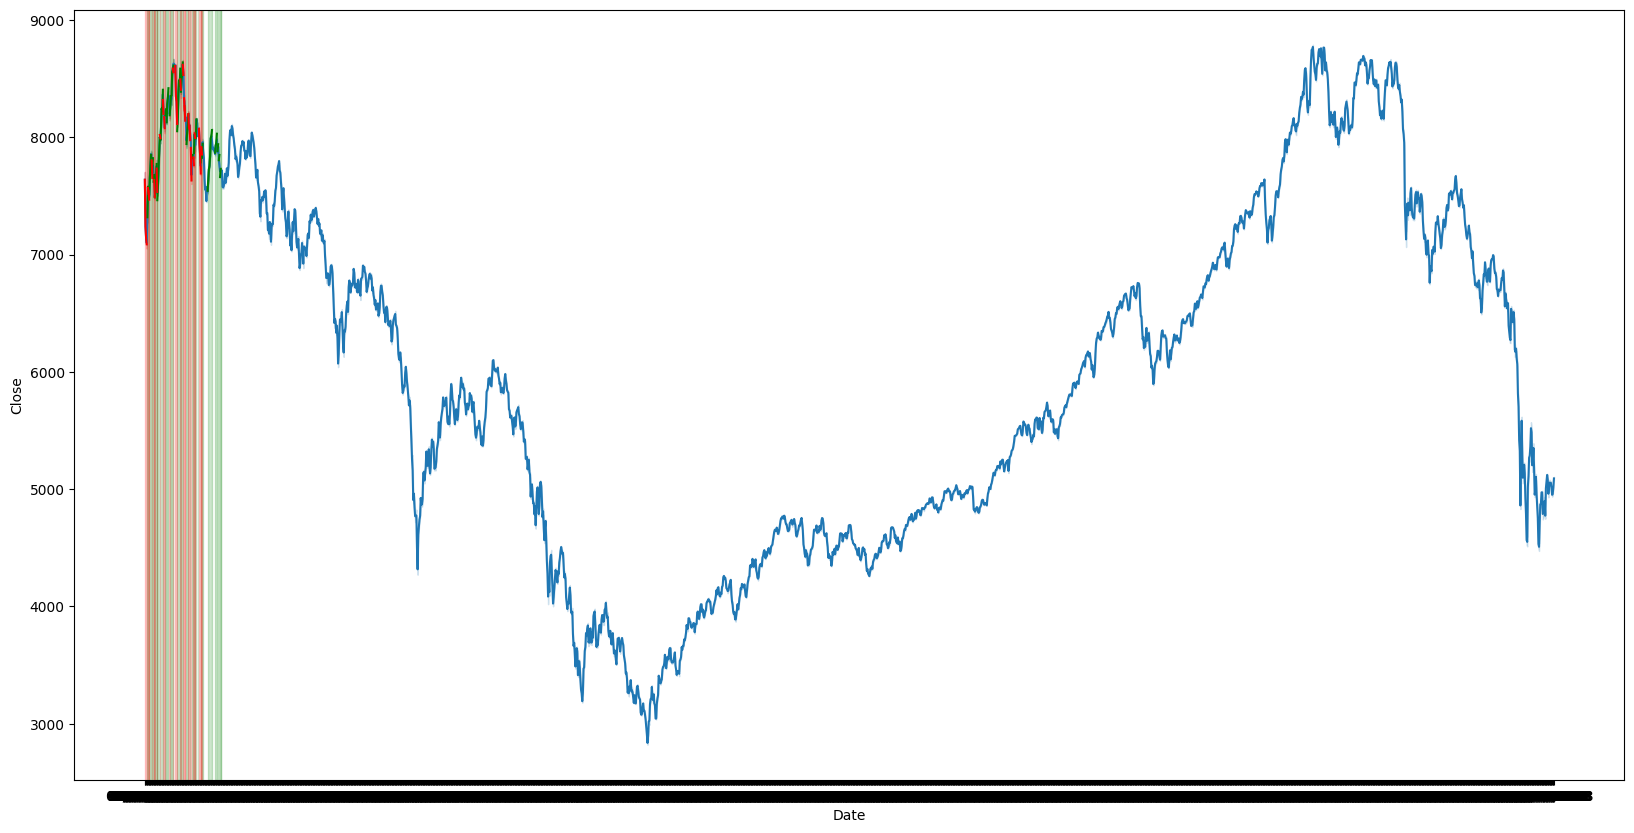

In [3]:
import trendet
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

begin = datetime(2000, 1, 3, 9, 0, 0)
end = datetime(2008, 12, 30, 14, 0 , 0)

dax = pandas.read_csv('data/dax.csv')

dax['Datetime'] = pandas.to_datetime(dax['Date'] + " "+ dax['Time'])

dax.set_index('Datetime', inplace=True)

dax = dax[begin:end]

print(dax)

res = trendet.identify_df_trends(df=dax, column='Close')

res.reset_index(inplace=True)

plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=res['Date'], y=res['Close'])

labels = res['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=res[res['Up Trend'] == label]['Date'],
                    y=res[res['Up Trend'] == label]['Close'],
                    color='green')

    ax.axvspan(res[res['Up Trend'] == label]['Date'].iloc[0],
                res[res['Up Trend'] == label]['Date'].iloc[-1],
                alpha=0.2,
                color='green')

labels = res['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=res[res['Down Trend'] == label]['Date'],
                    y=res[res['Down Trend'] == label]['Close'],
                    color='red')

    ax.axvspan(res[res['Down Trend'] == label]['Date'].iloc[0],
                res[res['Down Trend'] == label]['Date'].iloc[-1],
                alpha=0.2,
                color='red')

plt.show()
